In [33]:
# Drive mount
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
import sys
print(sys.executable)

# /usr/bin/python3

/usr/bin/python3


In [35]:
import cv2
import os
print(cv2.__version__)

# 4.12.0

4.12.0


height3024, width4032


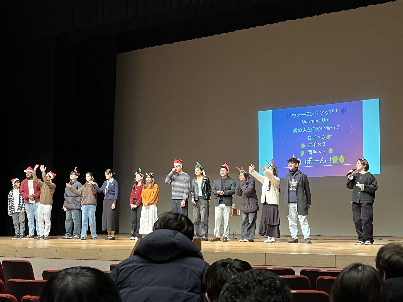

In [36]:
# 画像データを読む
from google.colab.patches import cv2_imshow

path = "/content/drive/MyDrive/15_OpenCV-Flickr画像/Image_recognition/img/"
img = cv2.imread(path + "IMG_1020.jpg")

height, width = img.shape[:2]
print(f"height{height}, width{width}")

h, w = img.shape[:2]

scale = 0.1  # 10%表示
img_s = cv2.resize(img, (int(w*scale), int(h*scale)))
cv2_imshow(img_s)

In [ ]:
"""
動画Movie の調整
ガンマ補正
"""
import numpy as np
import cv2

def gamma_correction(img, gamma=1.6):
    inv = 1.0 / gamma
    table = np.array([
        ((i / 255.0) ** inv) * 255
        for i in range(256)
        ]).astype("uint8")
    return cv2.LUT(img, table)


In [ ]:
"""
【ihone .MOV】
iPhone動画データをOpenCVは読み込むことができない
MOV → MP4（H.264）に変換する　Clipchampで前もって変換しておく
"""
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

path2 =  "/content/drive/MyDrive/15_OpenCV-Flickr画像/Image_recognition/St_Video/St-01.mp4"

# Videoをcapに読み込む
cap = cv2.VideoCapture(path2)
print("isOpened =", cap.isOpened())

width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
fps = cap.get(cv2.CAP_PROP_FPS)

print(f"width:{width}, height:{height}")
print(f"count:{count}, fps:{fps}")


"""
 映像フレームを画像にする
"""
num = 0
num_frame = 140
list_frame = []

# isOpened() オブジェクトが有効に初期化され使用可能な状態か」を判定
if not cap.isOpened():
    raise RuntimeError("動画を開けませんでした")

while(cap.isOpened()):
    ret, frame = cap.read()
    if not ret:
      break
    else:
      frame = gamma_correction(frame, gamma=1.6)
      frame_small = cv2.resize(frame, (960, 540))
      frame_small = cv2.cvtColor(frame_small, cv2.COLOR_BGR2RGB)
      frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
      list_frame.append(frame_small)

      if num>num_frame:
         break
      num = num + 1

print("処理を完了しました", "num=", num)

### 注意
cap.release()

isOpened = True
width:1920, height:1080
count:235, fps:30.0
処理を完了しました num= 141


In [ ]:
# アニメーションの画像サイズを大きくする
import matplotlib as mpl
mpl.rcParams['animation.embed_limit'] = 45  # MB

In [ ]:
# フレーム画像をアニメーション表示
from IPython.display import HTML, display

fig, ax = plt.subplots()
ax.axis("off")

img = ax.imshow(list_frame[0])

def func_animate(i):
    img.set_data(list_frame[i])
    return (img,)

anime = FuncAnimation(fig, func_animate, frames=len(list_frame), blit=True, interval=1000/28)

display(HTML(anime.to_jshtml()))
plt.close(fig)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# 保存が必要なときは、セルを「実行」
# アニメーションを動画ファイルで保存
from matplotlib.animation import FFMpegWriter

writer = FFMpegWriter(fps=30)
st = "/content/drive/MyDrive/15_OpenCV-Flickr画像/Image_recognition/St_Video/"
anime.save(st+"new-St-01.mp4", writer=writer)

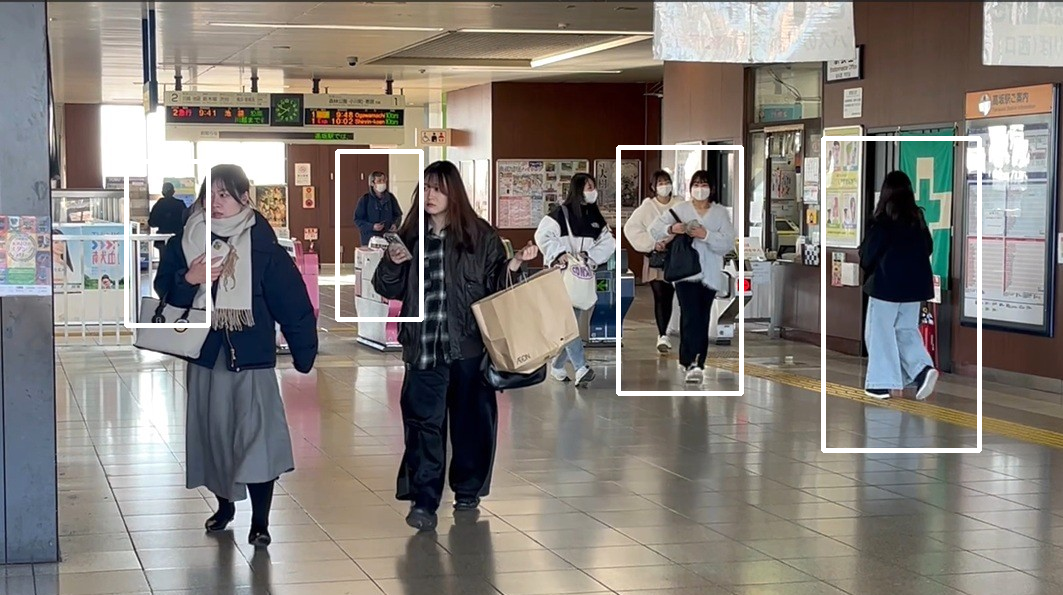

r>0ならば人の確率が大  r<0ならば人の確率は小
r= [1.03043539 1.99629544 0.53719494 1.44589215]


In [49]:
"""
画像内のどこに人がいるのかを検出
"""
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from google.colab.patches import cv2_imshow

hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
hogParams = {'winStride': (8, 8), 'padding': (32, 32), 'scale': 1.05, 'hitThreshold':0, 'groupThreshold':5}

path2 =  "/content/drive/MyDrive/15_OpenCV-Flickr画像/Image_recognition/St_Video/Station-Photo01.jpg"

# 画像を読み込む
img = cv2.imread(path2)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 人を、みつけさせる
hogParams = dict(
    winStride=(9, 8),
    padding=(8, 8),
    scale=1.1
)

# r=svmのスコア
human, r = hog.detectMultiScale(gray, **hogParams)
if (len(human)>0):
    for (x, y, w, h) in human:
        cv2.rectangle(img, (x, y), (x + w, y + h), (255,255,255), 3)
cv2_imshow(img)

print("r>0ならば人の確率が大"," r<0ならば人の確率は小")
print("r=", r)
